## Fruit Classification Using CNN
This dataset contains 5 different fruits. The train and test dataset are already in a separate file. In this model, we are going to build a CNN model and train and test the dataset.

In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

### Loading Dataset

In [2]:
train_dir = "/Tensorflow/Fruits/train"

classes = os.listdir(train_dir)
print(classes)

['Apple', 'Grapes', 'Orange', 'Pineapple', 'Strawberry']


Above are the directory of the train dataset which contains 5 folders with names Apple, Grapes, Orange, Pineapple, and Strawberry.

In [3]:
test_dir = "/Tensorflow/Fruits/test"

classes = os.listdir(test_dir)
print(classes)

['Apples', 'Grapes', 'Orange', 'Pineapple', 'Strawberry']


In the above cells, is the directory of the test dataset which also contains 5 folders with names Apple, Grapes, Orange, Pineapple, and Strawberry the same with the train dataset.

### Visualizing Dataset
To verify the dataset, we will plot 5 images where 1 image is displayed from each categories in train and test dataset.

#### Training dataset
The cell below shows some samples from the train dataset from each folders.

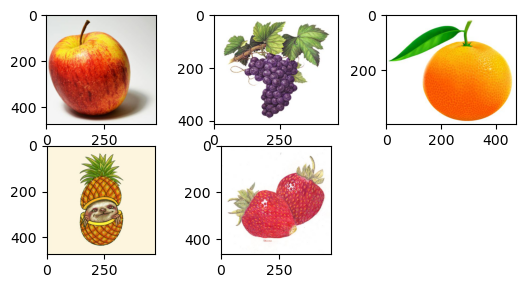

In [4]:
image1 = imread('/Tensorflow/Fruits/train/Apple/001_2abbd697.jpg')
image2 = imread('/Tensorflow/Fruits/train/Grapes/001_30d02382.jpg')
image3 = imread('/Tensorflow/Fruits/train/Orange/001_bddd33ca.jpg')
image4 = imread('/Tensorflow/Fruits/train/Pineapple/001_df9bac21.jpg')
image5 = imread('/Tensorflow/Fruits/train/Strawberry/001_ff6e67f5.jpg')
plt.subplot(3,3,1).imshow(image1)
plt.subplot(3,3,2).imshow(image2)
plt.subplot(3,3,3).imshow(image3)
plt.subplot(3,3,4).imshow(image4)
plt.subplot(3,3,5).imshow(image5)

#### Test dataset
The cell below shows some samples from the test dataset from each folders.

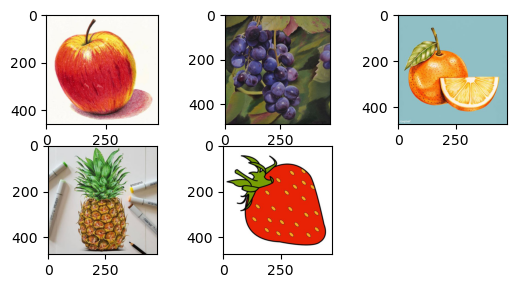

In [5]:
image1 = imread('/Tensorflow/Fruits/test/Apples/007_246e8b07.jpg')
image2 = imread('/Tensorflow/Fruits/test/Grapes/195_056d796f.jpg')
image3 = imread('/Tensorflow/Fruits/test/Orange/006_15081ed4.jpg')
image4 = imread('/Tensorflow/Fruits/test/Pineapple/003_27dc12dd.jpg')
image5 = imread('/Tensorflow/Fruits/test/Strawberry/002_fffb37e4.jpg')
plt.subplot(3,3,1).imshow(image1)
plt.subplot(3,3,2).imshow(image2)
plt.subplot(3,3,3).imshow(image3)
plt.subplot(3,3,4).imshow(image4)
plt.subplot(3,3,5).imshow(image5)

### Data Preprocessing
In this section, the data is processed by augmenting different position and idetifying its size.

#### Training Set

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/Tensorflow/Fruits/train',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                shuffle=True,
                                                class_mode = 'categorical')

Found 800 images belonging to 5 classes.


#### Test Set

In [7]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('/Tensorflow/Fruits/test',
                                                target_size = (64,64),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 200 images belonging to 5 classes.


### Building the Model
The lines of code below define the CNN base using a pattern of Conv2D and MaxPooling2D layers. As input, the model takes tensors of shape (64,64,3) in which 64 is the height and width of the image and 3 is the color_channel.

To complete the model, the image will be flatten from 3D to 1D and add a dense layers. The final dense layer will be for the output which we have is 5.

Lastly, we will compile the model by using the "adam" as the optimizer, "categorical_crossentropy" as the loss metric, and accuracy.

In [8]:
#initialize CNN
model = Sequential()

#1st Convolutional layer and Pooling layer
model.add(Conv2D(32,(3,3), input_shape = (64,64,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#2nd Convolutional Layer and Pooling layer
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#3rd Convolutional Layer and Pooling layer
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

#Flatten Layers
model.add(Flatten())

#Full Connection
model.add(Dense(units=125, activation = 'relu'))
model.add(Dense(units=5, activation = 'softmax'))

#compile CNN
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

Here is the summary of the model.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

The summary shows that the output of every Conv2D and MaxPooling2D layer shrink as it goes deeper in the network. The last output were flatten into (2304) before going through the dense layers.

### Training Model
In this section, we are going to train the model by using the fit() function with the processed dataset, validation data, and the number of epochs and its steps. The validation data is our test dataset and the number of epochs is the number of times the model will cycle through the data. We also included the steps per epoch which determines the batches to train.

In [10]:
batch_size = 50
hist = model.fit(training_set,
          steps_per_epoch = training_set.samples//batch_size,
          epochs = 30,
          validation_data = test_set)

Epoch 1/30
16/16 [==============================] - 4s 246ms/step - loss: 1.5374 - accuracy: 0.2676 - val_loss: 1.4132 - val_accuracy: 0.4200
Epoch 2/30
16/16 [==============================] - 4s 225ms/step - loss: 1.3208 - accuracy: 0.4570 - val_loss: 1.1612 - val_accuracy: 0.6200
Epoch 3/30
16/16 [==============================] - 3s 219ms/step - loss: 1.0858 - accuracy: 0.5781 - val_loss: 0.9818 - val_accuracy: 0.6500
Epoch 4/30
16/16 [==============================] - 4s 229ms/step - loss: 0.9792 - accuracy: 0.5742 - val_loss: 0.9460 - val_accuracy: 0.6400
Epoch 5/30
16/16 [==============================] - 4s 229ms/step - loss: 0.8693 - accuracy: 0.6504 - val_loss: 0.9850 - val_accuracy: 0.6050
Epoch 6/30
16/16 [==============================] - 3s 218ms/step - loss: 0.8389 - accuracy: 0.6680 - val_loss: 0.9215 - val_accuracy: 0.6400
Epoch 7/30
16/16 [==============================] - 4s 230ms/step - loss: 0.8023 - accuracy: 0.6289 - val_loss: 0.8431 - val_accuracy: 0.7250
Epoch 

### Evaluation
In evaluation, we used a graph to show the rate of the model's loss and accuracy. As you can see in the graph, as the model are trained into the specified cycle, its loss decreases and the accuracy increases. It is the same for the validation loss and accuracy. It means that the model is learning and the result is parallel between the training and predicting the fruits. 

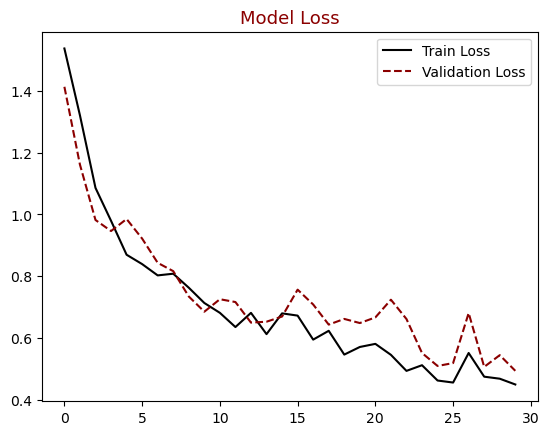

In [11]:
#loss chart
plt.figure()
plt.plot(hist.history["loss"],label = "Train Loss", color = "black")
plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

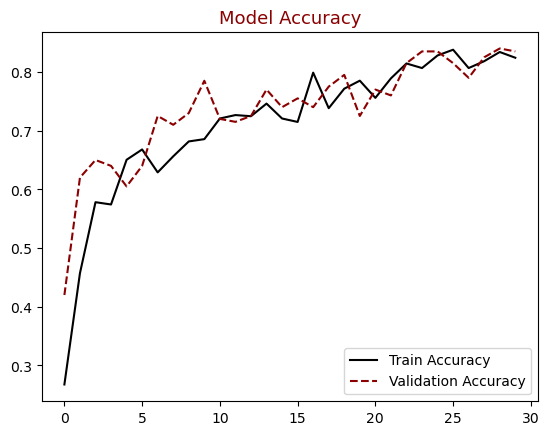

In [12]:
#accuracy chart
plt.figure()
plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

The accuracy rate of the validation or test data is shown below.

In [13]:
#Evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=1) 
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

7/7 [==============================] - 1s 119ms/step - loss: 0.5212 - accuracy: 0.8350
Test accuracy: 0.8349999785423279
Test loss: 0.5211690664291382


### Prediction
Below are some of the predicted fruits in response to the model we built. The value is equivalent to
['Apple': 0, 'Grapes': 1, 'Orange': 2, 'Pineapple': 3, 'Strawberry': 4]

Most of the result of the predicted test dataset are correct.

1/1 [==============================] - 0s 136ms/step


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9356\3443428909.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(k)


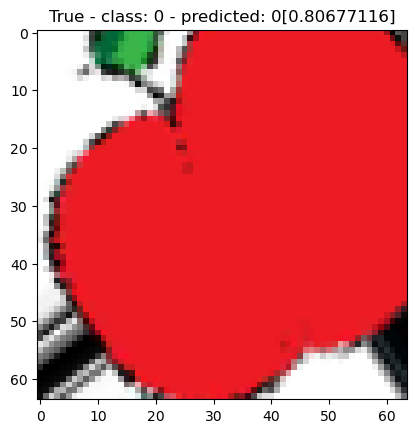

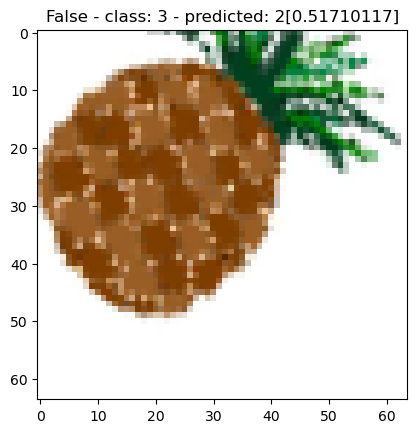

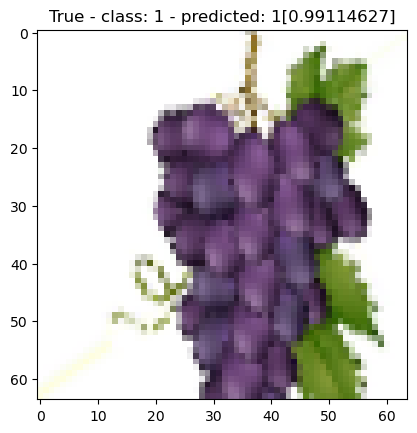

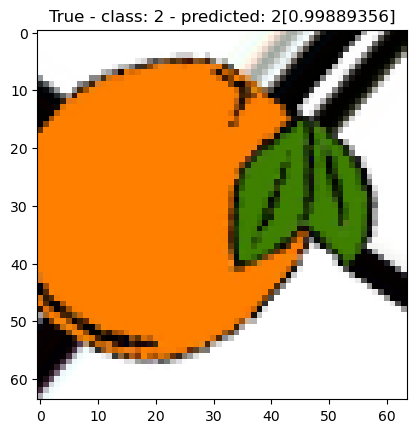

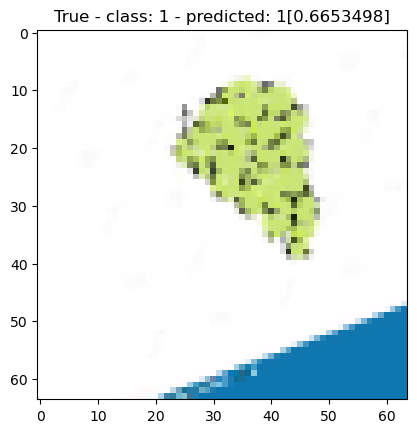

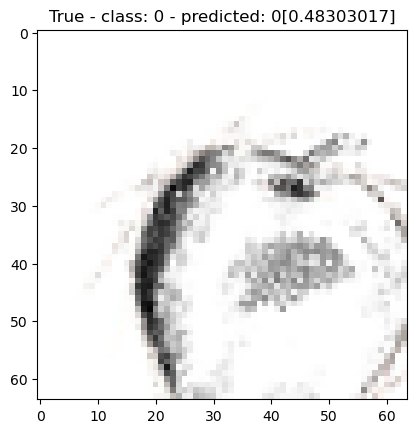

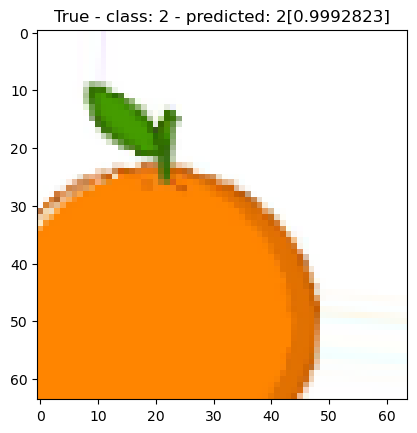

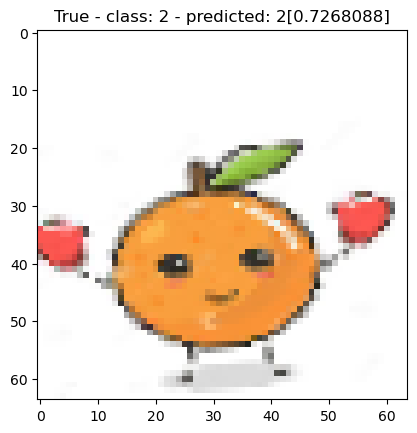

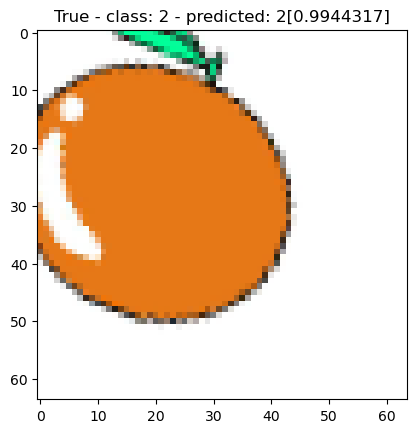

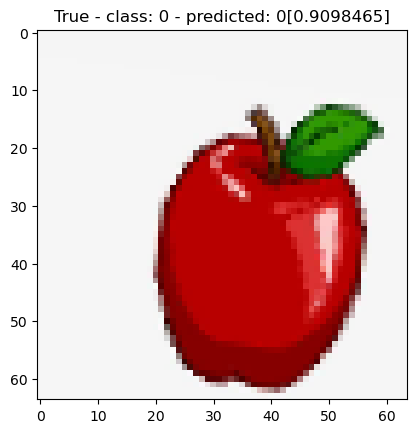

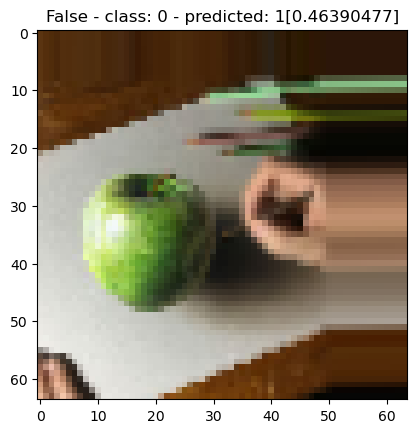

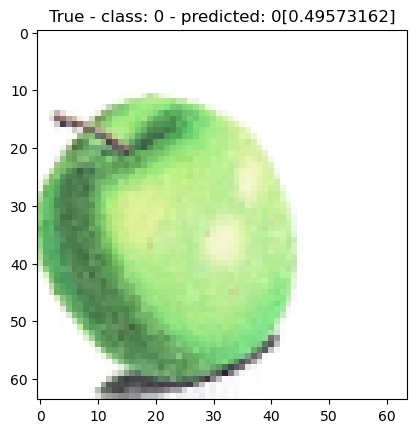

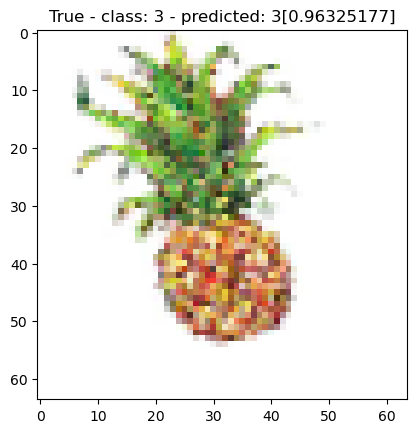

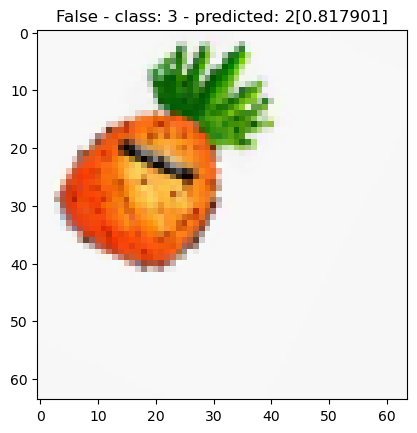

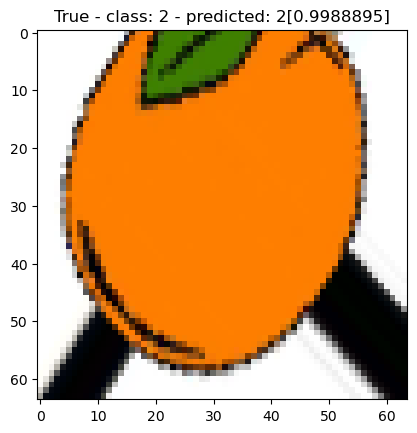

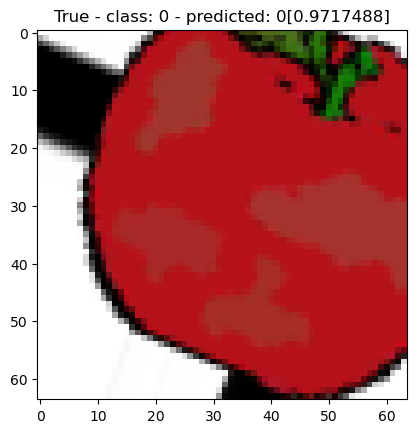

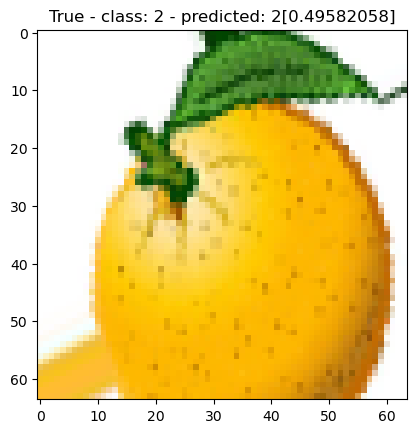

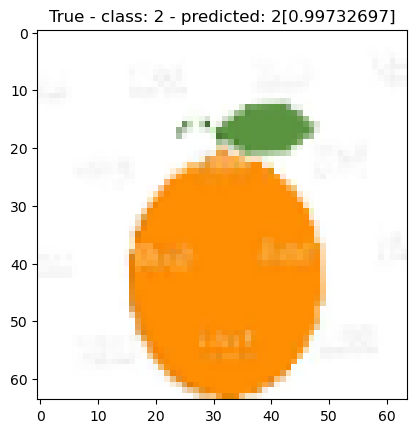

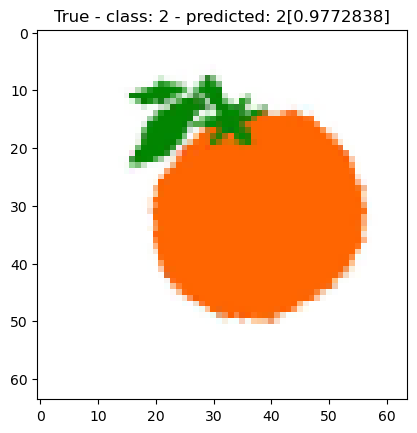

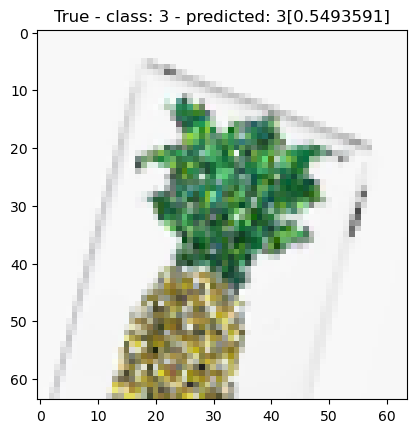

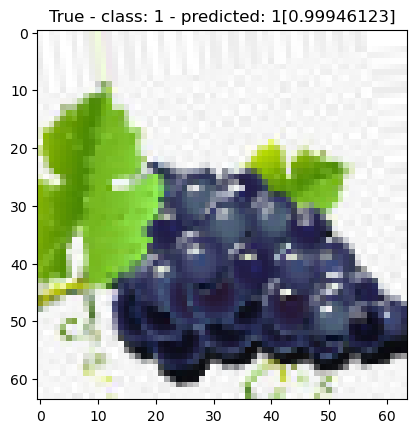

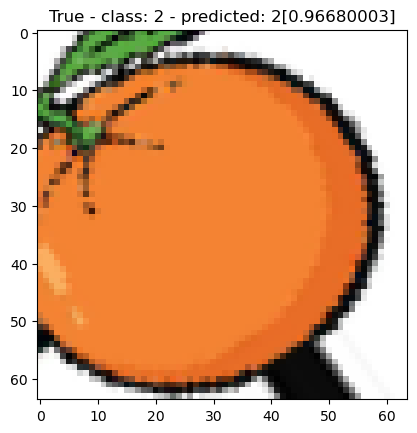

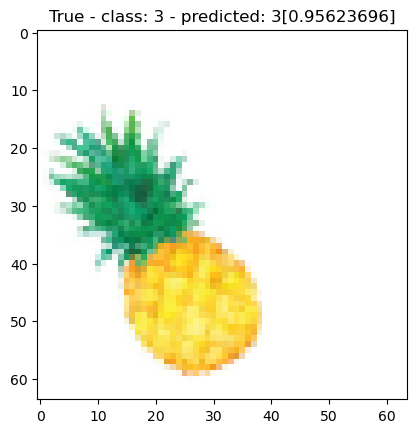

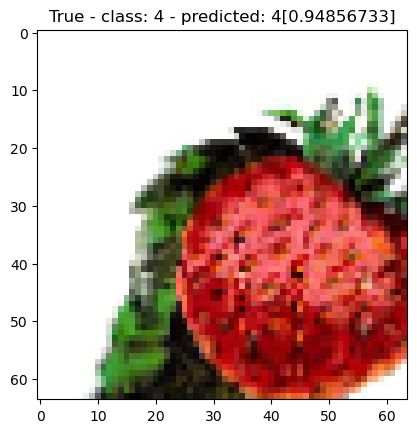

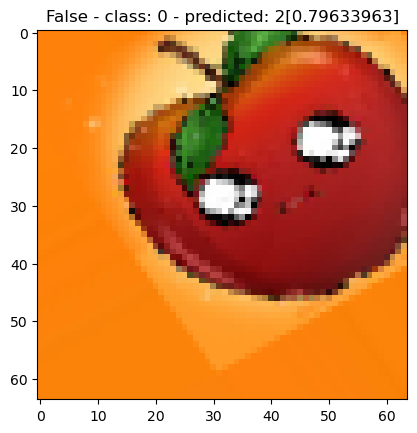

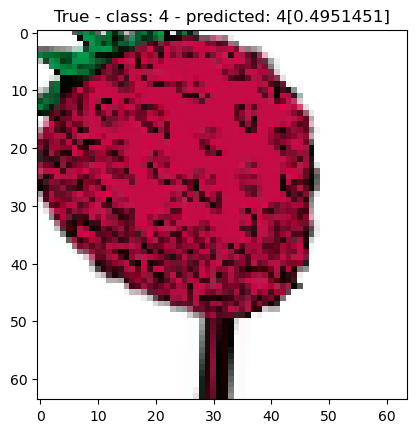

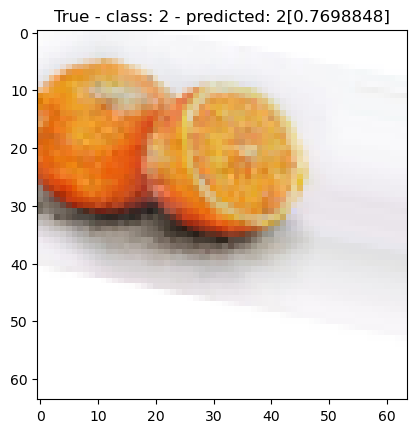

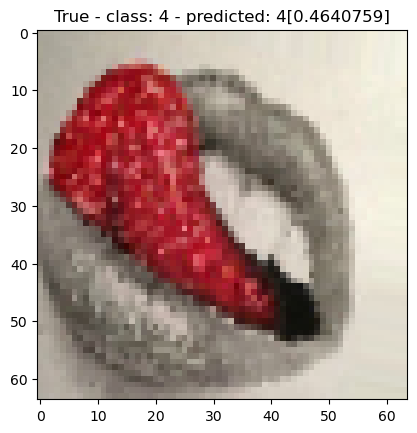

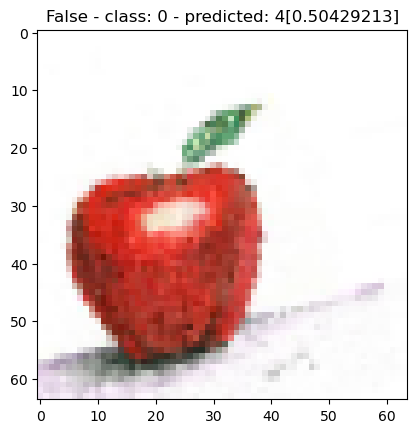

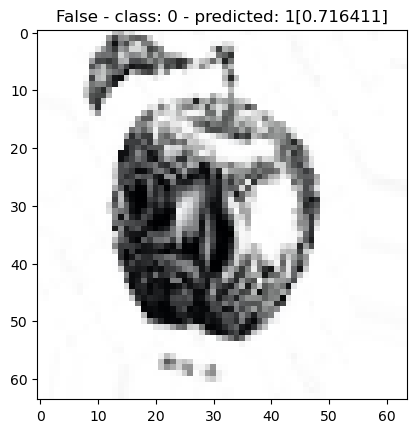

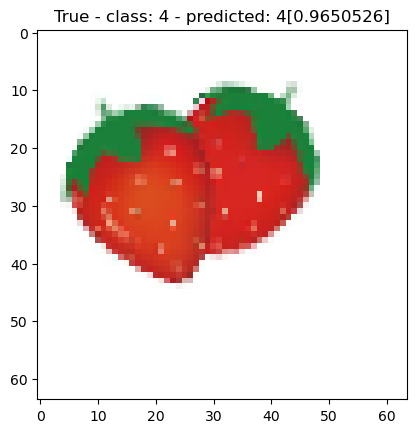

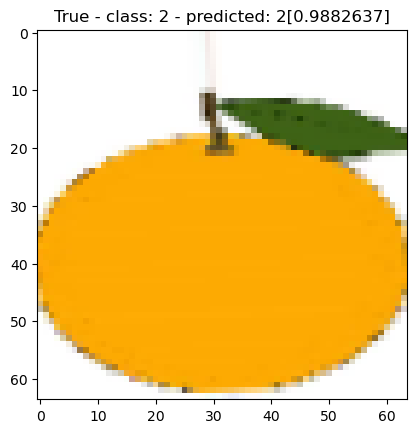

In [14]:
def predict_one(model):  
    image_batch, classes_batch = next(test_set)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0]):
      image = image_batch[k]
      pred = predicted_batch[k]
      the_pred = np.argmax(pred)
      predicted = str(the_pred)
      val_pred = max(pred)
      the_class = np.argmax(classes_batch[k])
      value = str(np.argmax(classes_batch[k]))
      plt.figure(k)
      isTrue = (the_pred == the_class)
      plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
      plt.imshow(image)

predict_one(model)  